# Reporting on Women's Progress
## by Lorraine A. Wheat

## Investigation Overview


> [The Social Institutions and Gender Index](https://www.oecd.org/en/about/programmes/social-institutions-and-gender-index-sigi.html#Dashboard) (SIGI) conducted the research. SIGI tracks the impact of discriminatory laws and social norms on females, documenting its findings to inform policy. Using the SIGI Framework, the overall goal is to visualize the progress of females in 12 countries with the world's higest GDP. SIGI progress measurements included in the data analysis include time spent on unpaid care and domestic work, perception of a housewife's work vs. paid work, gender gap in managerial roles, and legal discrimination in reproductive autonomy. The data analysis makes data-driven insights to identify key areas where gender equality needs attention in the countries with the world's highest GDP.

>[The SIGI Dashboard](https://www.oecd.org/en/data/dashboards/social-institutions-gender-index.html) uses a scale from 0 to 100:
> * **0 equals** no discrimination
> * **100 equals** absolute discrimination


## Dataset Overview and Executive Summary

> * **Gender Inequality in Reproductive Autonomy:** Legal discrimination on reproductive autonomy scores the highest among gender-related metrics, especially in countries like Brazil and Italy, highlighting significant legal barriers for women in these areas.
> * **Household Gender Roles:** The perception that being a housewife is as fulfilling as working for pay generally scores higher than the gender gap in management, suggesting entrenched societal norms around women’s roles in households.
> * **Burden of Unpaid Domestic Work:** Across all countries, women spend significantly more time on unpaid care and domestic work than men, with the largest gaps in countries like Mexico and India, illustrating a persistent gender imbalance in domestic responsibilities.
> * **Legal Discrimination on Reproductive Rights:** Countries like Brazil, Japan, and the USA exhibit the highest levels of legal discrimination on reproductive autonomy, while nations such as Canada, France, and the UK show no legal barriers, suggesting global inconsistencies in reproductive rights.

In [372]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [374]:
from matplotlib.colors import Normalize
from matplotlib.markers import MarkerStyle
from matplotlib.text import TextPath
from matplotlib.transforms import Affine2D
from matplotlib.textpath import TextPath
from matplotlib.patches import PathPatch
import matplotlib.cm as cm


In [376]:
#Set display options
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)

[(0.984313725490196, 0.7058823529411765, 0.6823529411764706), (0.7019607843137254, 0.803921568627451, 0.8901960784313725), (0.8, 0.9215686274509803, 0.7725490196078432), (0.8705882352941177, 0.796078431372549, 0.8941176470588236), (0.996078431372549, 0.8509803921568627, 0.6509803921568628), (1.0, 1.0, 0.8), (0.8980392156862745, 0.8470588235294118, 0.7411764705882353), (0.9921568627450981, 0.8549019607843137, 0.9254901960784314), (0.9490196078431372, 0.9490196078431372, 0.9490196078431372), (0.984313725490196, 0.7058823529411765, 0.6823529411764706)]


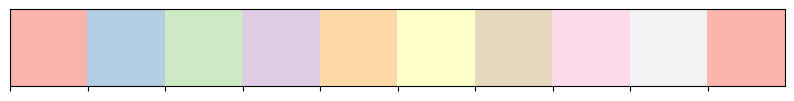

In [378]:
palette = sns.color_palette('Pastel1', 10) # Default color palette
print(palette)  # Prints the RGB tuples that make up this color palette
sns.palplot(palette) # Plotting your palette!
cube = sns.color_palette("cubehelix", as_cmap=True) # Get a CMap
print(cube)

# Extract a color by passing a value between 0 and 1
color1 = cube(0.2)  # Color corresponding to 20% of the colormap
color2 = cube(0.5)  # Color corresponding to 50% of the colormap
color3 = cube(0.8)  # Color corresponding to 80% of the colormap

#Fonts for titles and labels
title_font = {'family':'serif', 'color': 'black',  'weight': 'bold', 'size': 16}
label_font = {'family': 'sans-serif', 'color': 'black', 'weight': 'normal', 'size':12}

In [380]:
#load in the dataset into a pandas dataframe
oecd = pd.read_csv('/Users//Documents/Udacity/4_Data/4-7_Project/Data/OECD_DF_GIDDB2019_cleaned.csv')
oecdf = pd.read_csv('/Users//Documents/Udacity/4_Data/4-7_Project/Data/OECD_DF_GIDDB2019_clean_filtered.csv')

In [382]:
#Showdata is loaded
print(oecd.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462 entries, 0 to 461
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ref_code            462 non-null    object 
 1   measure_code        462 non-null    object 
 2   measure             462 non-null    object 
 3   unit_measure_code   462 non-null    object 
 4   unit_of_measure     462 non-null    object 
 5   age                 462 non-null    object 
 6   sex                 462 non-null    object 
 7   variable_category   462 non-null    object 
 8   sigi_code           462 non-null    object 
 9   sigi_framework      462 non-null    object 
 10  time_period         462 non-null    int64  
 11  obs_value           385 non-null    float64
 12  observation_status  462 non-null    object 
 13  unit_mult           462 non-null    int64  
 14  calc_method         462 non-null    object 
dtypes: float64(1), int64(2), object(12)
memory usage: 54.3+ K

## Comparing Three SIGI-Framework Measures Across Countries

> * This chart compares three different gender-related metrics across twelve countries with the highest GDP in the world. The data has observations on a scale from 0 to 100, with 0 being no discrimination and 100 being absolute discrimnation.
> * Gender-related metrics that are charted include the perception that being a housewife is as fulfilling as working for pay, the gender gap in management, and legal discrimination in reproductive autonomy.
> * In the chart "Comparing Different Gender-Related Metrics Across Countries," legal discrimination on reproductive autonomy (represented by the purple bars) scores higher in many countries compared to the other two metrics, particularly in Brazil and Italy. The perception of housewife status being as fulfilling as paid work (light blue) scores higher than the gender gap in management (light green) in most countries, except for China and Mexico where the gender gap metric is more prominent.
> * This suggests that both perceptions about gender roles in households are common and legal inequalities in reproductive autonomy remain a significant issue in countries with the highest GDP.


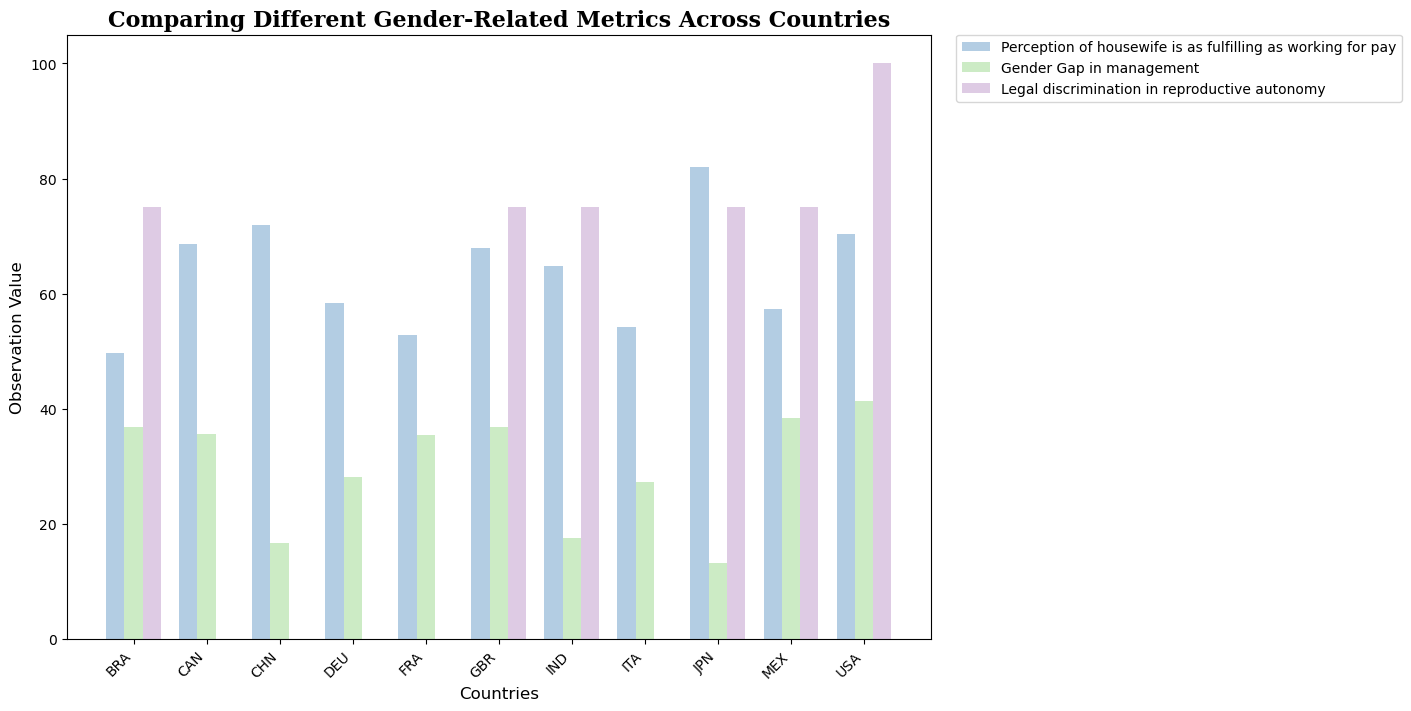

In [385]:
# Obtaining the filtered data
hw = oecdf[oecdf['measure'] == 'Perception that being a housewife is as fulfilling as working for pay']
gg = oecdf[oecdf['measure'] == 'Gender gap in managerial positions']
ra = oecdf[oecdf['measure'] == 'Legal discrimination on reproductive autonomy']

# Setting up the bar chart parameters
x = np.arange(len(hw['ref_code']))  # the label locations based on the length of 'hw'
width = 0.25  # The width of the bars
multiplier = 0

# Creating the plot and axes
fig, ax = plt.subplots(figsize=(14, 7), layout='constrained')  # layout to prevent overlapping labels

# Looping through measurement and plotting bars
for data, label, color in zip([hw, gg, ra], ['Perception of housewife is as fulfilling as working for pay', 'Gender Gap in management', 'Legal discrimination in reproductive autonomy'], [palette[1], palette[2],palette[3]]):
    offset = width * multiplier
    rects = ax.bar(x + offset, data['obs_value'], width, label=label, color=color)
    multiplier += 1

# Set axis labels and title
ax.set_xlabel('Countries', label_font)
ax.set_ylabel('Observation Value', label_font)
ax.set_title('Comparing Different Gender-Related Metrics Across Countries', title_font)

# Set x-tick labels
ax.set_xticks(x + width)  # Adjust x-ticks to align with bar groups
ax.set_xticklabels(hw['ref_code'], rotation=45, ha='right')

# Adding a legend
ax.legend(bbox_to_anchor=(1.03,1), loc="upper left", borderaxespad=0)

# Show the plot
plt.show()



## Time spent on unpaid care and domestic work (male vs. female)

> This chart shows how much time men and women spend on unpaid care and domestic work across various countries. In all countries displayed, women (in pink) spend significantly more time on unpaid domestic work than men (in blue). Countries like Mexico and India show the largest gap between male and female participation in domestic work. This suggests that across these countries, the burden of unpaid household work continues to fall disproportionately on women.

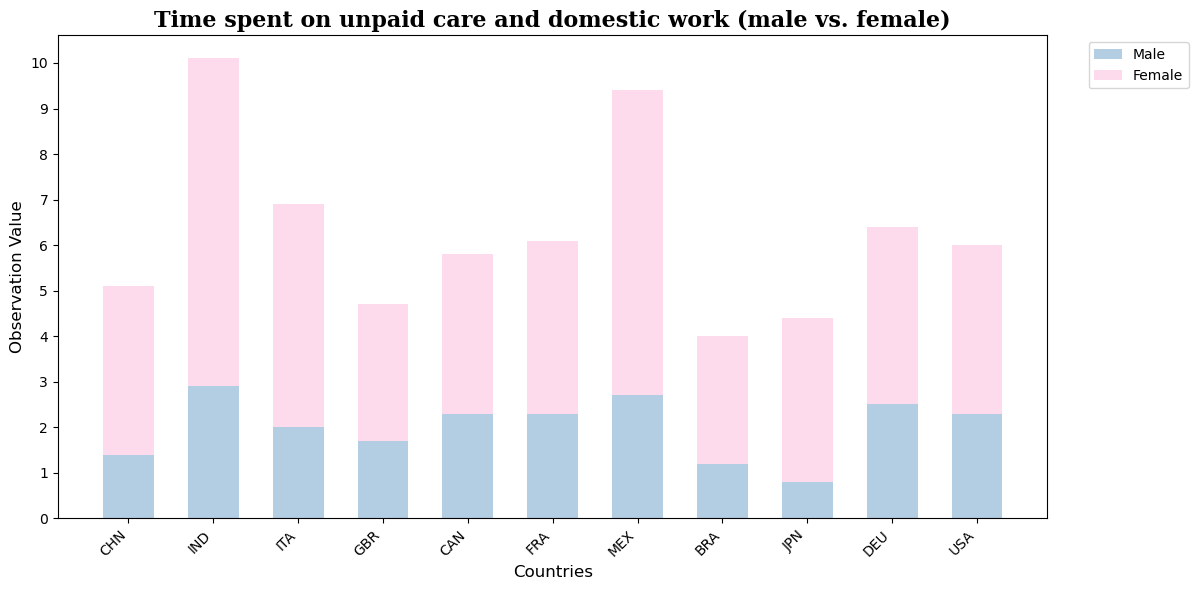

In [388]:
# Obtaining data for plotting
male = oecd[(oecd['measure'] == 'Time spent on unpaid care and domestic work') & (oecd['sex'] == 'Male')]
female = oecd[(oecd['measure'] == 'Time spent on unpaid care and domestic work') & (oecd['sex'] == 'Female') & ~(oecd['unit_of_measure'] == "Factor of men's time")]

#merge the datasets on 'ref_code' to ensure matching countries
merged_df = pd.merge(male[['ref_code', 'obs_value']], female[['ref_code','obs_value']], on='ref_code', suffixes=('_male','_female'))


# Group by countries or categories
x = np.arange(len(merged_df['ref_code']))  # the label locations

#Ensure that male and female datasets have matching lengths and are sorted consistently
assert len(male) == len(female), "Male and female datasets must have same length."

# Setting up the bar chart parameters
width = 0.6  # Adjust the bar width
fig, ax = plt.subplots(figsize=(12, 6))  # Create the figure and the axis

# Plotting bars
p1 = ax.bar(x, merged_df['obs_value_male'], width, label='Male', color=palette[1])
p2 = ax.bar(x, merged_df['obs_value_female'], width, label='Female', bottom=merged_df['obs_value_male'], color=palette[7])

# Setting the x-tick labels based on your categories (e.g., 'ref_code')
ax.set_xticks(x)
ax.set_xticklabels(male['ref_code'], rotation=45, ha='right')
ax.set_yticks(np.arange(0,11,1))

# Show titles, labels, and legend
ax.set_title("Time spent on unpaid care and domestic work (male vs. female)", title_font)
ax.set_xlabel("Countries", label_font)
ax.set_ylabel("Observation Value", label_font)
ax.legend(bbox_to_anchor=(1.15,1), loc="upper right")

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


## Legal discrimination on reproduction autonomy by country

> * This chart visualizes the level of legal discrimination on reproductive autonomy across the 12 countries with the highest GDP. The scale is from 0 to 100, with 0 representing no discrimination and 100 representing absolute discrimination.
> * Focusing on the purple bars show that countries Brazil, Japan, Mexico, Germany, India, and the USA represent the higest levels of discrimination.
> * The black bars show that countries Canada, France, Italy, China, and United Kingdom have no legal discrimination on reproduction autonomy. 

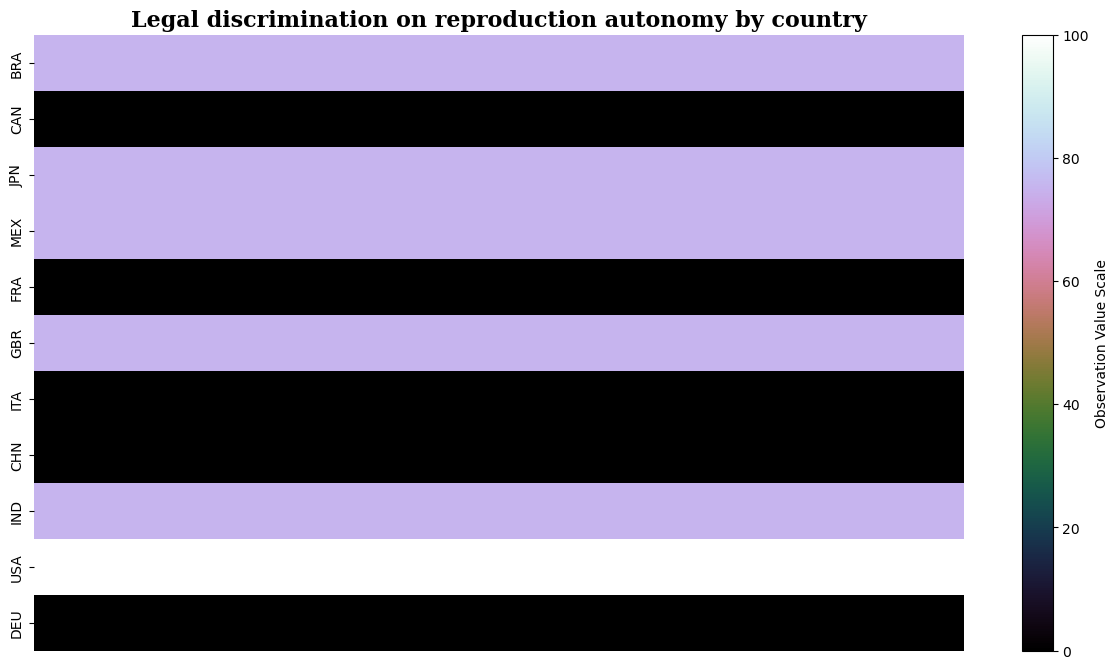

In [391]:
# Obtain reproductive autonomy data for plotting
ra = oecd[oecd['measure'] == 'Legal discrimination on reproductive autonomy']
y_ra = ra['ref_code']

# Reshape 'obs_value' into 2D for heatmap
ra_2d = ra['obs_value'].values.reshape(-1, 1)

# Create a colormap using cubehelix
cmap = cube

# Create figure and axis
fig, ax = plt.subplots(figsize=(15,8))

# Plot the heatmap
sns.heatmap(ra_2d, cmap=cmap, cbar=False, yticklabels=y_ra, xticklabels=False, ax=ax)

# Add color bar with the correct normalization
fig.colorbar(plt.cm.ScalarMappable(norm=Normalize(vmin=ra['obs_value'].min(), vmax=ra['obs_value'].max()), cmap=cmap),
             ax=ax, label="Observation Value Scale")

#labels and titles
plt.title('Legal discrimination on reproduction autonomy by country', title_font)


# Display the plot
plt.show()
